# Simulation parameters

- Ltency = 0 => ntetwork is synchronous
- Sigma (transmission slots) = 1
- Router - rectangle
- Frame length = 64us
- średnica żyły 9.08 mm


# Wyprowadzenie wzoru na r z prawdopodobieństwa p(A) z pracy 

* $A$ - z pracy - obszar działania routera
* $T$ - z pracy - czas obserwacji
* $v$ - z pracy - szybkość przepływu krwi
* $v_{1} = \pi{r^2}l$ - objętość obserwowanego fragmentu żyły
* $r$ - promień obserwowanego fragmentu żyły
* $l$ - długość obserwowanego fragmentu żyły
* $v_{T}$ - objętość całkowita krwi w ciele dorosłego człowieka

$p_{A} = \frac{A}{vT} = \frac{v_{1}}{v_{T}}\\ $

$\frac{A}{vT} = \frac{\pi{r^2}l}{v_{T}}\\ $

$\frac{Av_{T}}{vT} = \pi{r^2}l\\ $

${r^2} = \frac{Av_{T}}{vT\pi l}\\ $

$r = \sqrt{\frac{Av_{T}}{vT\pi l}}\\ $


Podstawiając:

$A = {10^{-3}}m = 1mm \\ $

$v = 0,24m/s = 240mm/s \\ $

$T = 60s \\ $

$v_{T} = 5,6l = 5,6 * {10^6}{mm^3}\\ $

$l = 6mm\\ $

Otrzymuję:

$r = \sqrt{\frac{1*5,6*{10^6}}{240*60*\pi*6}}\\ $

$r = 4.54 $

Czyli średnica żyły wynosi 9.08 mm, co jest wynikiem prawdopodobnym. Zastanawiam się czy pod $ l $ nie powinienem podstawić samego obszaru działania routera (czyli 1 mm) ponieważ A to również obszar działania routera. Wtedy jednak średnica żyły wychodzi około 22mm, co nie wydaje się być prawdopodobne.

# Wyjaśnienie oznaczeń
* base - symulacja podstawowa, model routera sprowadzony do porstokąta w przekroju poprzecznym, zastosowany złożony model prędkości z prędkością średnią 0,24mm/s
* simp - symulacja uproszczona, parametry takie jak w base ale stała prędkość krwi równa 0,24m/s niezależna od odległości od środka żyły
* gauss - parametry takie same jak w "simp" z dodanym rozkładem normalnym o odchyleniu równym 10% liczby węzłów w obserwowanym fragmencie żyły (wyliczonej z proporcji)
* gauss2 - "gauss" ze stałym odchyleniem równym 0,3

In [1]:
import pandas as pd
df_base = pd.read_csv (r'nodeCountTT64_simp05_baza.csv')
df_simp = pd.read_csv (r'nodeCountTT64_simp05_off0_1.csv')
df_gauss = pd.read_csv (r'nodeCountTT64_simp05_gauss.csv')
df_gauss2 = pd.read_csv (r'nodeCountTT64_simp05_gauss2.csv')

In [2]:
df_base = df_base.apply(pd.to_numeric, errors='coerce')
df_simp = df_simp.apply(pd.to_numeric, errors='coerce')
df_gauss = df_gauss.apply(pd.to_numeric, errors='coerce')
df_gauss2 = df_gauss2.apply(pd.to_numeric, errors='coerce')

In [3]:
import numpy as np
data_base = df_base.to_numpy()
data_simp = df_simp.to_numpy()
data_gauss = df_gauss.to_numpy()
data_gauss2 = df_gauss2.to_numpy()

<IPython.core.display.Javascript object>


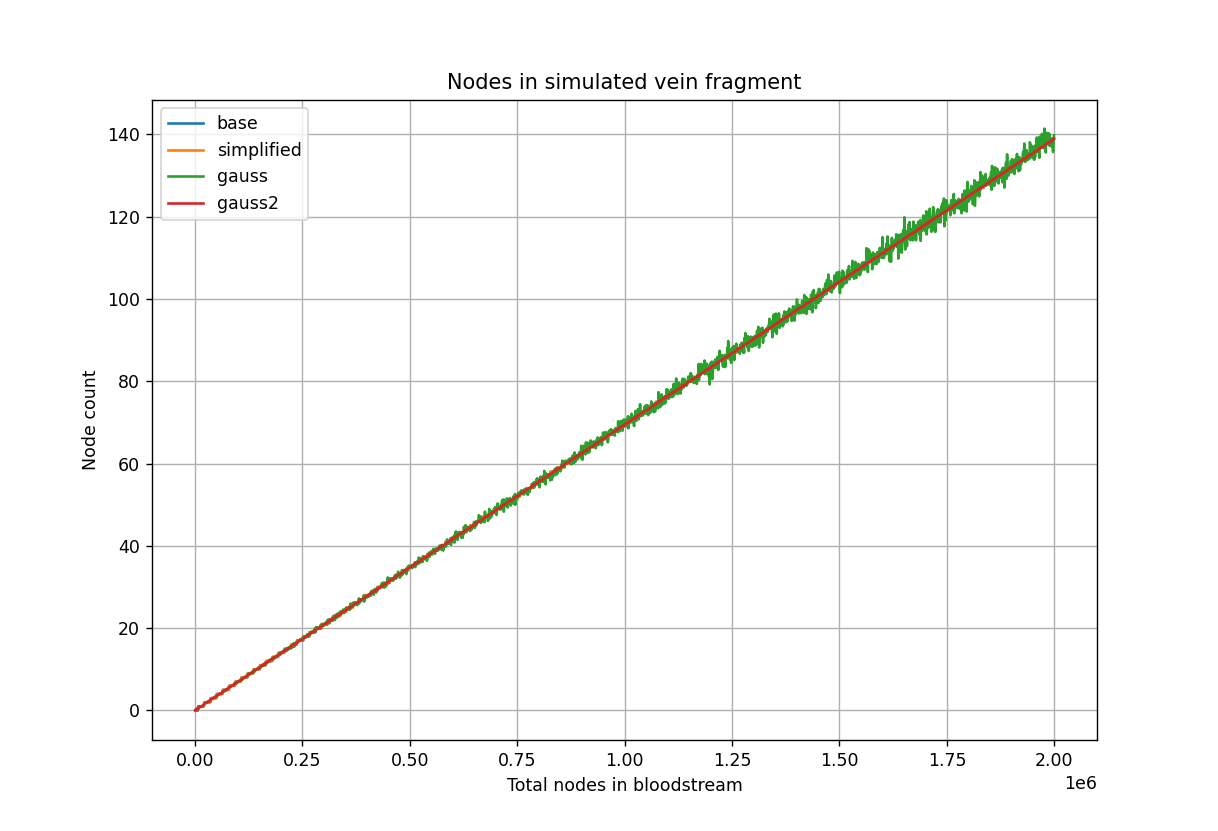

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(data_base[:, 0], data_base[:, 1], data_simp[:, 0], data_simp[:, 1], data_gauss[:, 0], data_gauss[:, 1], data_gauss2[:, 0], data_gauss2[:, 1])
plt.title("Nodes in simulated vein fragment")
plt.ylabel("Node count")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.legend(["base", "simplified", "gauss", "gauss2"])

<IPython.core.display.Javascript object>


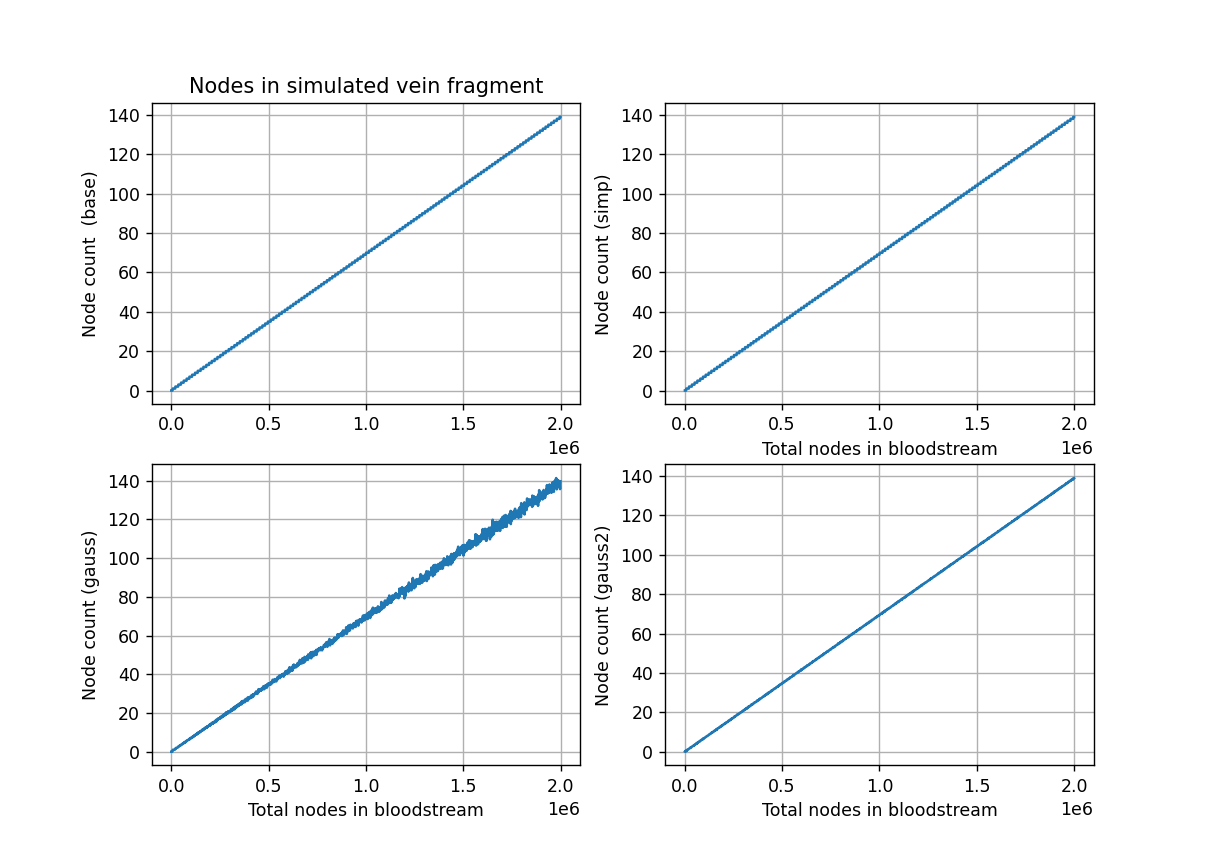

In [5]:
%matplotlib notebook
plt.figure(1)
plt.subplot(221)
plt.plot(data_base[:, 0], data_base[:, 1])
plt.title("Nodes in simulated vein fragment")
plt.ylabel("Node count  (base)")
plt.grid()
plt.subplot(222)
plt.plot(data_simp[:, 0],  data_simp[:, 1])
plt.ylabel("Node count (simp)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.subplot(223)
plt.plot(data_gauss[:, 0],  data_gauss[:, 1])
plt.ylabel("Node count (gauss)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.subplot(224)
plt.plot(data_gauss2[:, 0],  data_gauss2[:, 1])
plt.ylabel("Node count (gauss2)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()

<IPython.core.display.Javascript object>


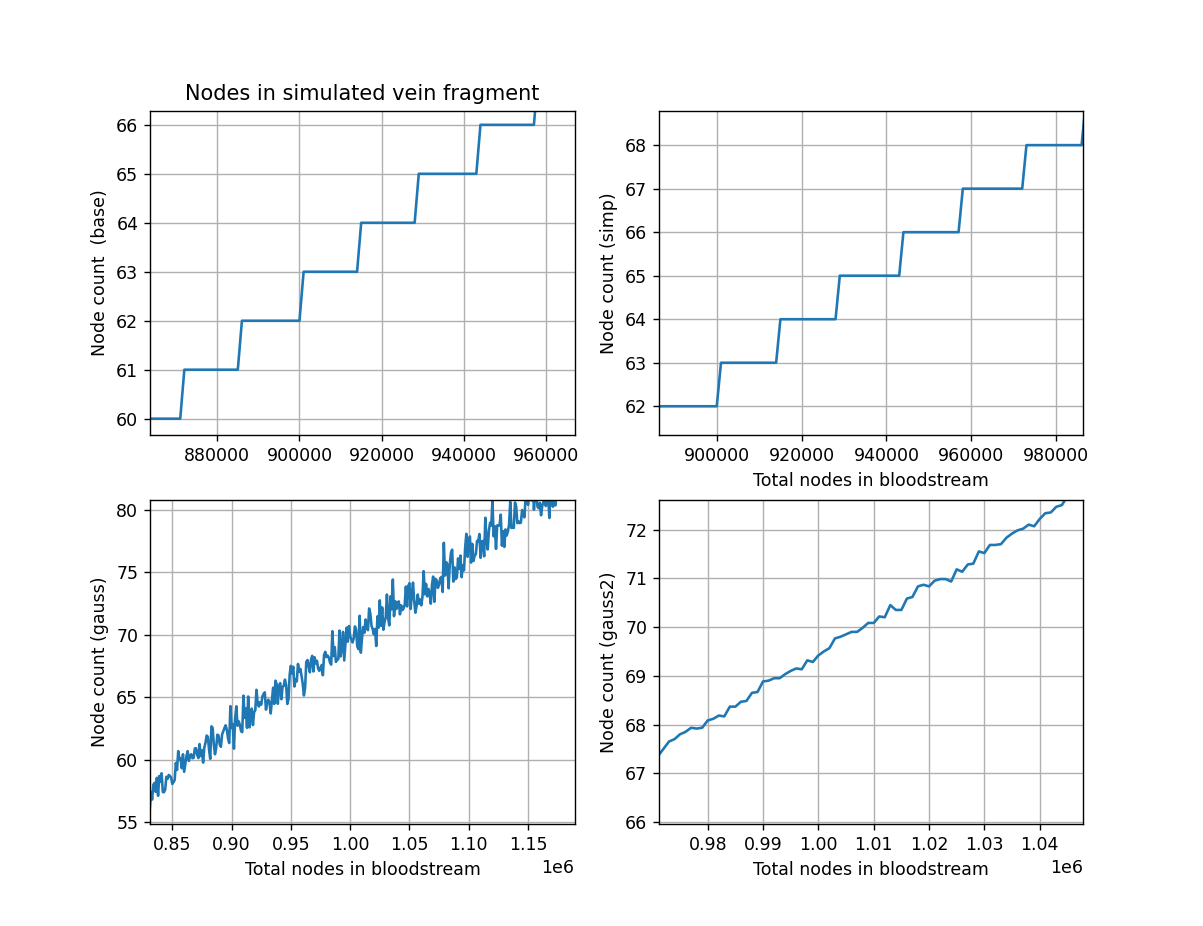

In [6]:
%matplotlib notebook
plt.figure(1)
plt.subplot(221)
plt.plot(data_base[:, 0], data_base[:, 1])
plt.title("Nodes in simulated vein fragment")
plt.ylabel("Node count  (base)")
plt.grid()
plt.subplot(222)
plt.plot(data_simp[:, 0],  data_simp[:, 1])
plt.ylabel("Node count (simp)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.subplot(223)
plt.plot(data_gauss[:, 0],  data_gauss[:, 1])
plt.ylabel("Node count (gauss)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.subplot(224)
plt.plot(data_gauss2[:, 0],  data_gauss2[:, 1])
plt.ylabel("Node count (gauss2)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()

<IPython.core.display.Javascript object>


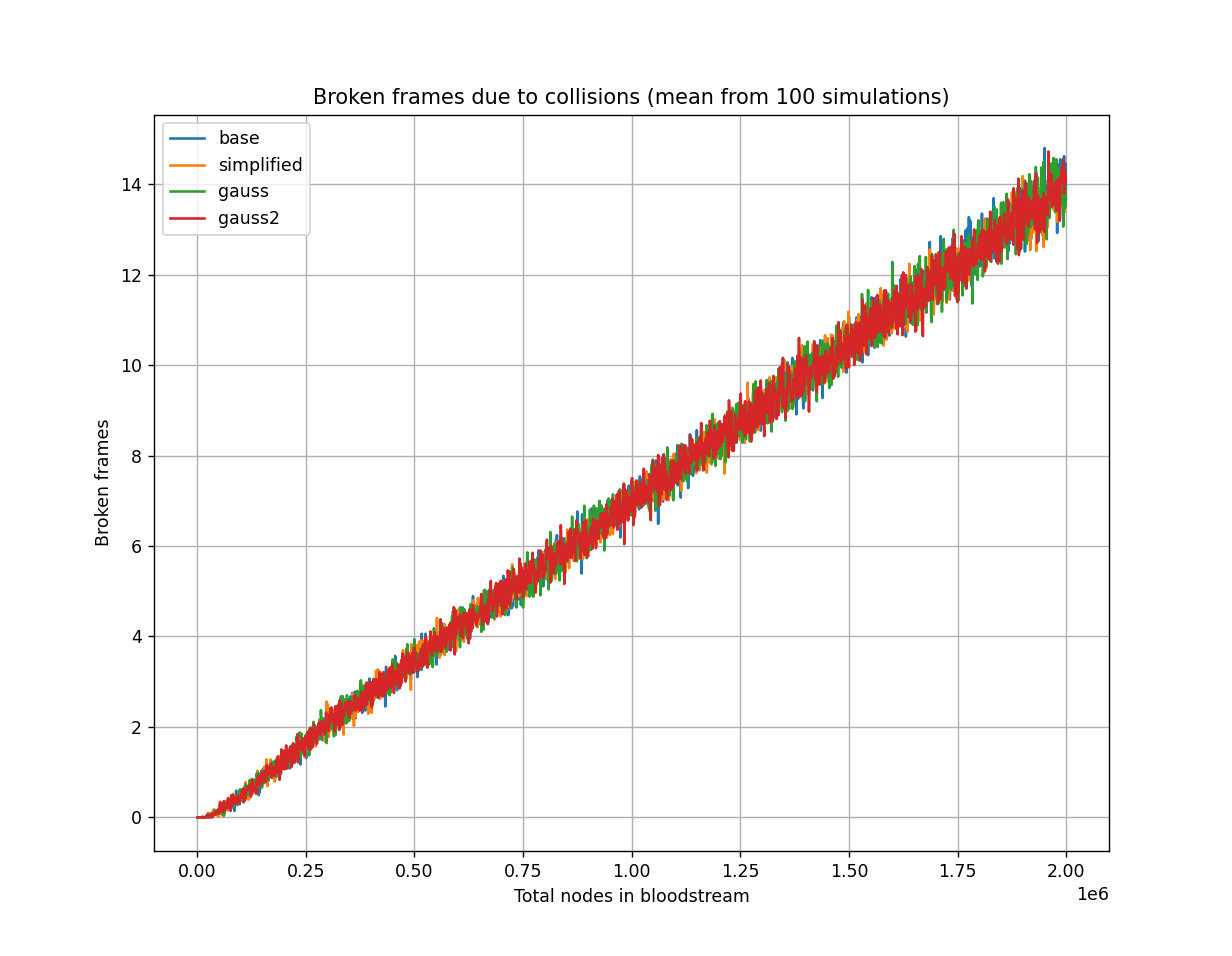

In [7]:
%matplotlib notebook
plt.plot(data_base[:, 0], data_base[:, 2]/100, data_simp[:, 0], data_simp[:, 2]/100, data_gauss[:, 0], data_gauss[:, 2]/100, data_gauss2[:, 0], data_gauss2[:, 2]/100)
plt.title("Broken frames due to collisions (mean from 100 simulations)")
plt.ylabel("Broken frames")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.legend(["base", "simplified", "gauss", "gauss2"])

<IPython.core.display.Javascript object>


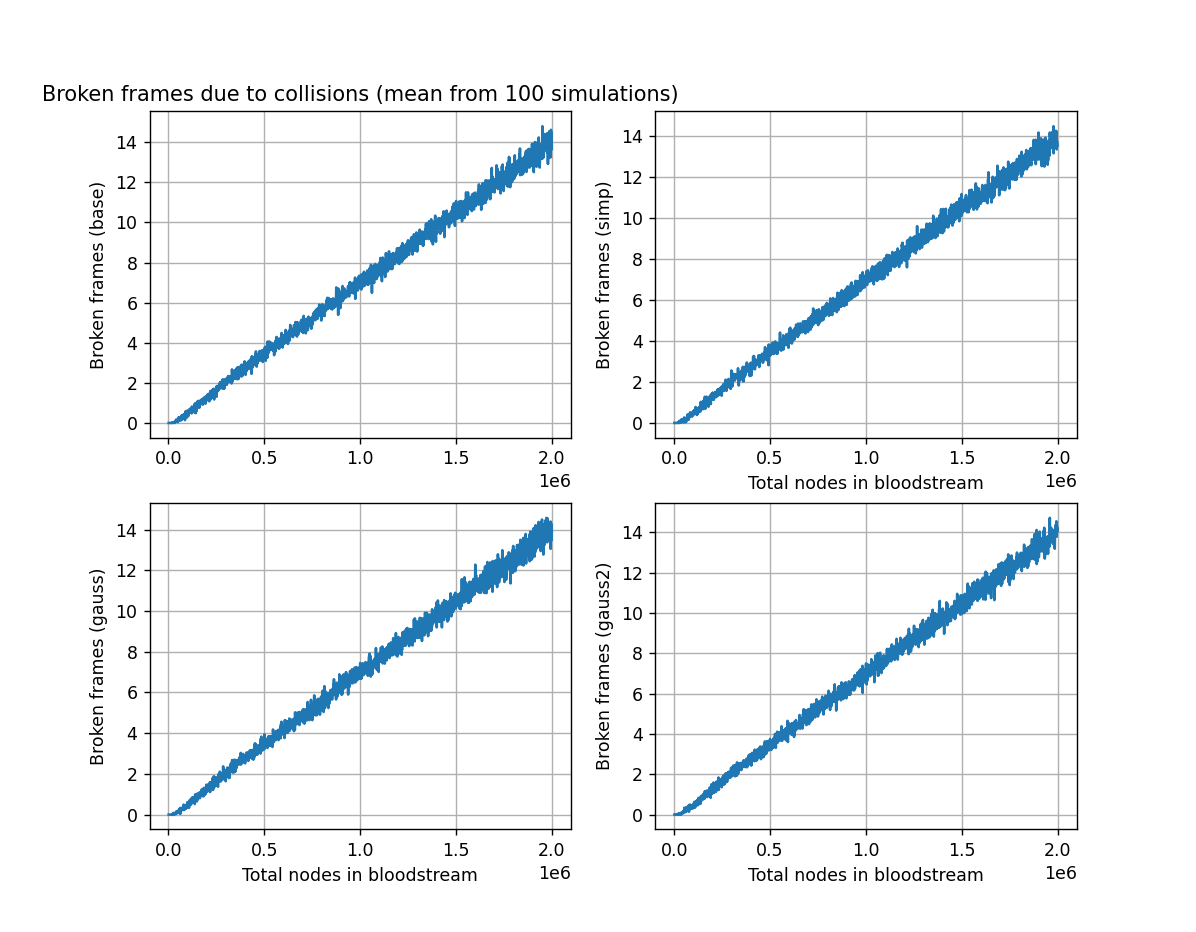

In [8]:
%matplotlib notebook
plt.figure(2)
plt.subplot(221)
plt.plot(data_base[:, 0], data_base[:, 2]/100)
plt.title("Broken frames due to collisions (mean from 100 simulations)")
plt.ylabel("Broken frames (base)")
plt.grid()
plt.subplot(222)
plt.plot(data_simp[:, 0],  data_simp[:, 2]/100)
plt.ylabel("Broken frames (simp)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.subplot(223)
plt.plot(data_gauss[:, 0],  data_gauss[:, 2]/100)
plt.ylabel("Broken frames (gauss)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.subplot(224)
plt.plot(data_gauss2[:, 0],  data_gauss2[:, 2]/100)
plt.ylabel("Broken frames (gauss2)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()

<IPython.core.display.Javascript object>


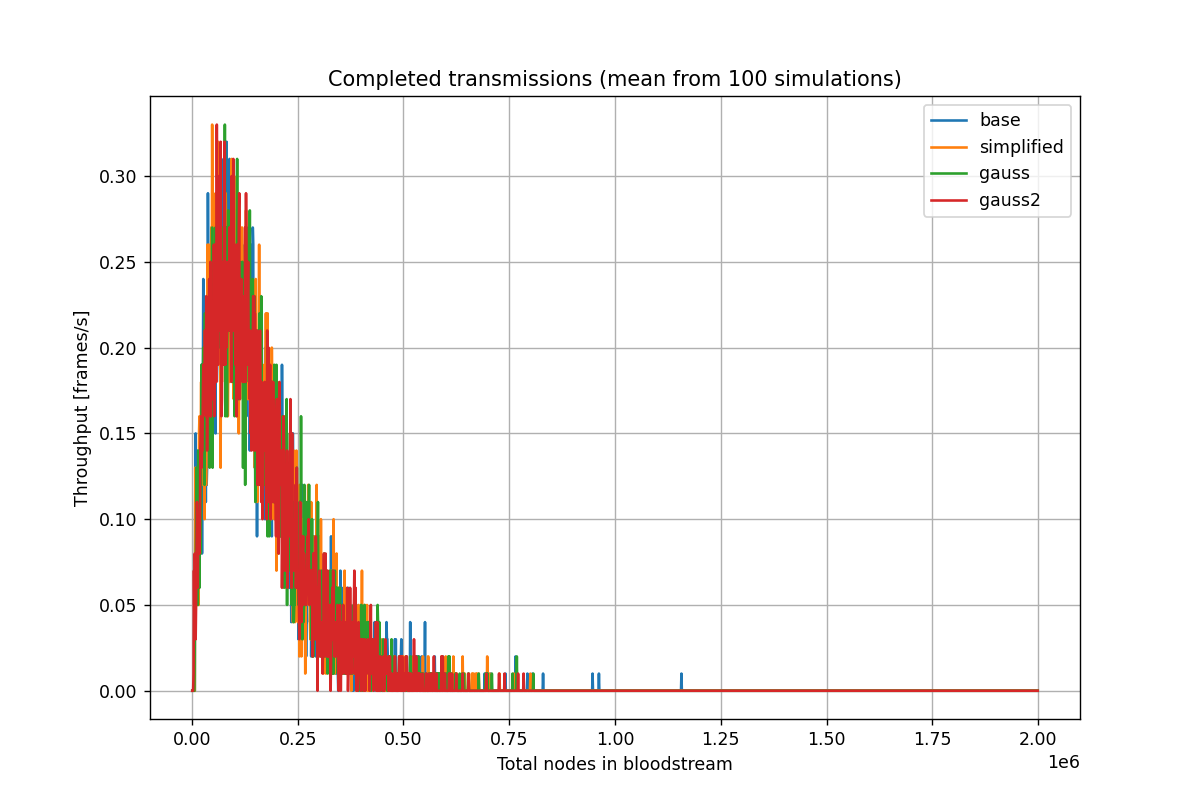

In [9]:
%matplotlib notebook
plt.plot(data_base[:, 0], data_base[:, 3]/100, data_simp[:, 0], data_simp[:, 3]/100, data_gauss[:, 0], data_gauss[:, 3]/100, data_gauss2[:, 0], data_gauss2[:, 3]/100)
plt.title("Completed transmissions (mean from 100 simulations)")
plt.ylabel("Throughput [frames/s]")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.legend(["base", "simplified", "gauss", "gauss2"])

<IPython.core.display.Javascript object>


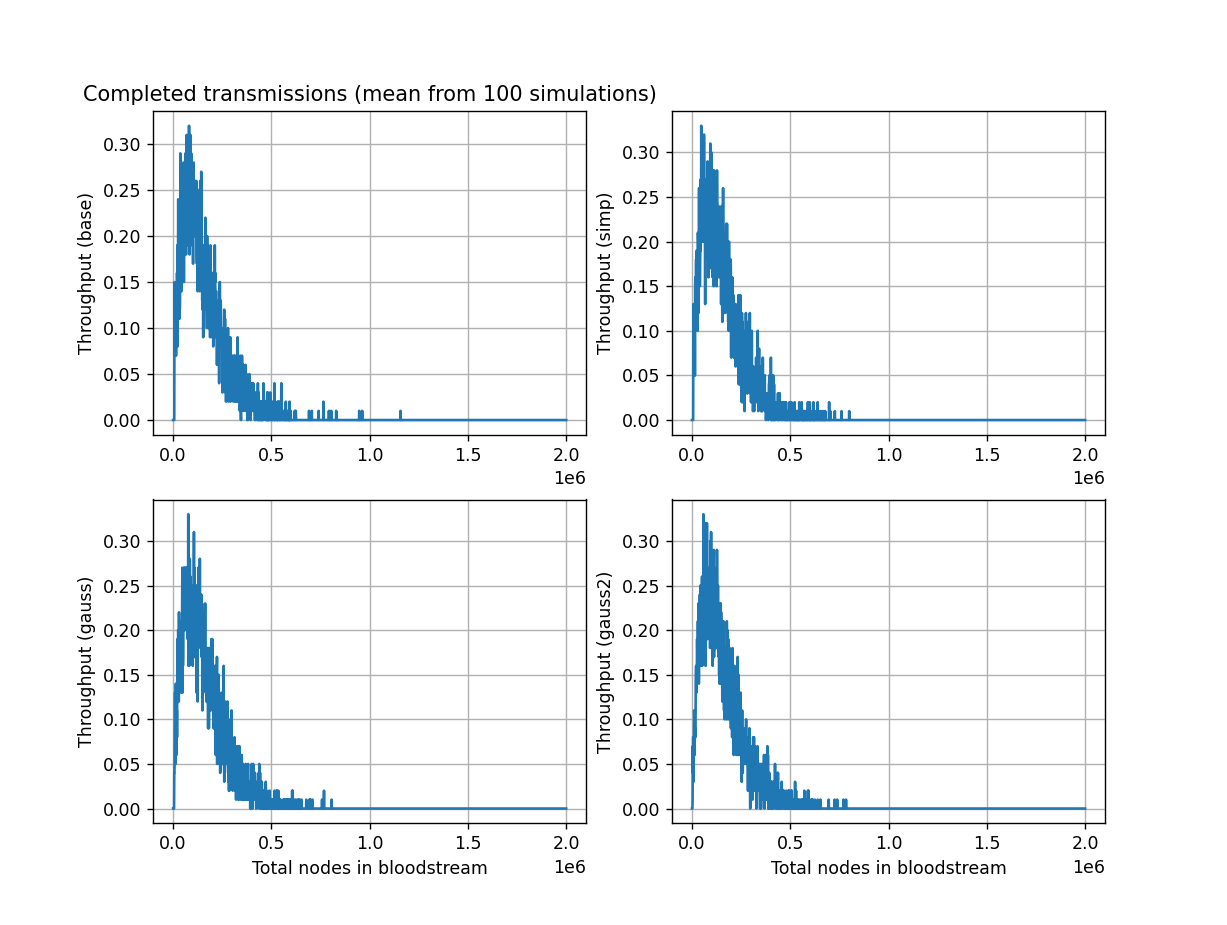

In [10]:
%matplotlib notebook
plt.figure(2)
plt.subplot(221)
plt.title("Completed transmissions (mean from 100 simulations)")
plt.plot(data_base[:, 0], data_base[:, 3]/100)
plt.ylabel("Throughput (base)")
plt.grid()
plt.subplot(222)
plt.plot(data_simp[:, 0], data_simp[:, 3]/100)
plt.ylabel("Throughput (simp)")
plt.grid()
plt.subplot(223)
plt.plot(data_gauss[:, 0],  data_gauss[:, 3]/100)
plt.ylabel("Throughput (gauss)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()
plt.subplot(224)
plt.plot(data_gauss2[:, 0],  data_gauss2[:, 3]/100)
plt.ylabel("Throughput (gauss2)")
plt.xlabel("Total nodes in bloodstream")
plt.grid()